<a href="https://colab.research.google.com/github/Mrinal7862/MultipleLinearRegressions/blob/main/multipleLinearRegression2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [112]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


In [113]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [114]:
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [115]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [116]:
housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [117]:
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [118]:
housing.target_names

['MedHouseVal']

In [119]:
hf = pd.DataFrame(housing.data, columns=housing.feature_names)

In [120]:
hf['target'] = housing.target

In [121]:
hf

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [122]:
#EDA
#Missing Value Treatment

In [123]:
hf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [124]:
hf.sample(3)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
12305,3.0625,25.0,12.517606,2.536385,1874.0,2.199531,33.75,-116.71,1.505
13034,6.1359,52.0,8.275862,1.517241,6675.0,230.172414,38.69,-121.15,2.250
3051,2.7000,29.0,6.986301,1.150685,236.0,3.232877,35.55,-119.36,1.250


In [125]:
hf.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
target,0


In [126]:
hf.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [127]:
hf.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
target,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


<Axes: >

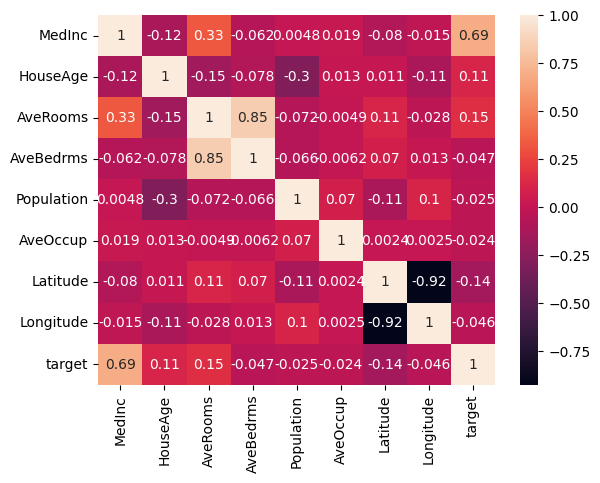

In [128]:
sns.heatmap(hf.corr(), annot=True)

In [129]:
#Seperate X and Y =

X = hf.iloc[:, :-1] #independent
y = hf.iloc[:, -1] #Dependant variable

In [150]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [151]:
#train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test =  train_test_split(X,y, test_size=0.30, random_state=1)

In [131]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((14448, 8), (6192, 8), (14448,), (6192,))

In [132]:
hf.shape

(20640, 9)

In [133]:
#Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [153]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [155]:
X_train

array([[-0.50715954, -1.07853296, -0.44712678, ..., -0.03473461,
        -0.68811806,  0.64821297],
       [-0.36780162,  0.98848922, -0.40478899, ...,  0.04136812,
        -0.85669979,  0.6531961 ],
       [-0.72098999,  1.62449604, -0.21327712, ..., -0.03379571,
         0.52473385, -0.08929041],
       ...,
       [-1.45114921,  1.06799007, -0.2117232 , ..., -0.03858451,
        -0.79582306,  0.6531961 ],
       [-0.65684615, -1.47603722, -0.17247966, ..., -0.02821367,
        -0.88947957,  1.2013405 ],
       [-0.83089789,  0.5114841 , -0.31691522, ..., -0.04325394,
         1.01174774, -1.31015748]])

In [156]:
X_test

array([[-0.32961194,  0.82948751, -0.36257229, ..., -0.10860423,
        -0.73494632,  0.60336479],
       [-1.00314873,  0.67048581, -0.17365888, ..., -0.0414458 ,
         0.53878233, -0.1042398 ],
       [ 0.07463726,  1.38599348, -0.37148887, ...,  0.05285456,
         0.98365079, -1.41978636],
       ...,
       [-0.68105238,  1.46549433, -0.2930547 , ..., -0.02800075,
         1.166281  , -1.33507314],
       [-0.66871091, -1.23753466, -0.15265383, ..., -0.03129222,
         1.14286687, -1.33009001],
       [-1.14621438,  0.03447898, -0.98708262, ..., -0.01613065,
        -0.71621502,  0.63326357]])

In [157]:
#model Training

from sklearn.linear_model import LinearRegression

In [158]:
model = LinearRegression()

In [159]:
model.fit(X_train, y_train)

LinearRegression()

In [160]:
X_train.shape

(14448, 8)

In [161]:
model.coef_
model.intercept_

2.076531482558146

In [162]:
y_pred = model.predict(X_test)

In [163]:
#performance metrics
from sklearn.metrics import mean_absolute_error,  mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("MSE", mse)

MSE 0.5296293151408233


In [164]:
#R Square and Adjusted R Square
r2 = r2_score(y_test, y_pred)

In [165]:
r2

0.5971429737359629

In [166]:
# Adjusted Rsquare  1 - (1-rs1)/(n-p-1)
1 - (1-r2)*(len(y_test)-1)/(len(y_test) - X_test.shape[1]-1)

0.5966217289987621

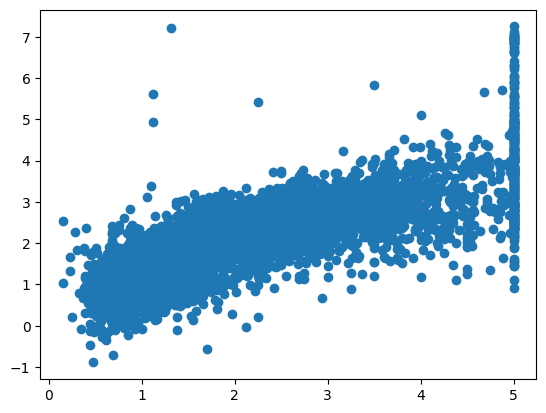

In [167]:
#Assumption
plt.scatter(y_test, y_pred)

In [168]:
error = y_test - y_pred

In [169]:
error

,target
4712,1.424016
2151,-0.234045
15927,-0.416429
82,-0.585309
8161,-0.579151
...,...
11387,-0.162307
2523,-0.521052
18897,-0.758178
18878,0.082042


<Axes: xlabel='target', ylabel='Density'>

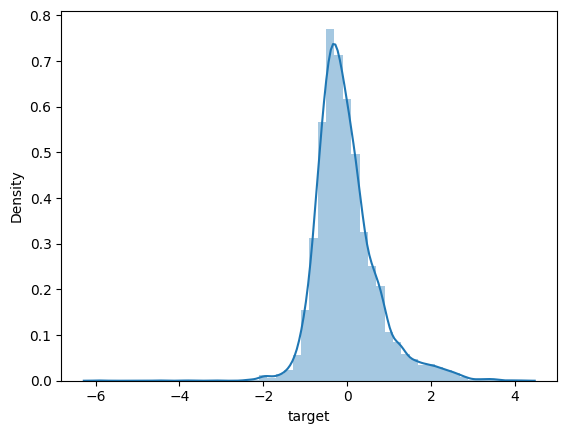

In [170]:
sns.distplot(error, kde=True)

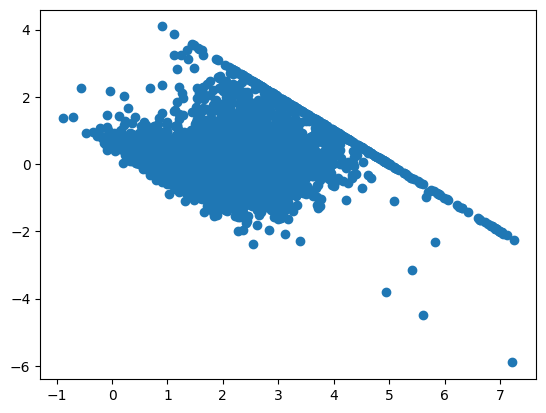

In [171]:
# scatter plot of y_pred and residuals
plt.scatter(y_pred, error)